In [91]:
from alinea.adel.adel_dynamic import AdelDyn
from alinea.adel.mtg_editions import find_metamers, add_plant, add_vegetative_metamer, new_mtg_factory, update_organ_elements, add_axe
from alinea.adel.mtg_interpreter import mtg_interpreter, transform_geom

from openalea.plantgl.all import Viewer, Scene
from openalea.mtg import MTG
from alinea.adel.geometric_elements import Leaves
from alinea.adel.newmtg import internode_elements, sheath_elements, blade_elements, convert, properties_from_dict, adel_metamer
import pandas as pd

import os
import random
import warnings
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from alinea.adel.Stand import AgronomicStand
from alinea.adel.echap_leaf import echap_leaves
from fspmwheat import caribu_facade
from fspmwheat import cnwheat_facade
from fspmwheat import elongwheat_facade
from fspmwheat import farquharwheat_facade
from fspmwheat import fspmwheat_facade
from fspmwheat import growthwheat_facade
from fspmwheat import senescwheat_facade

In [92]:
PLANT_DENSITY = {1: 250.}
INTER_ROW = 0.15
INPUTS_DIRPATH = r'C:\Users\gyoso.cho.TIRD\source\WheatFspm\WheatFspm\fspm-wheat\example\test_run\Scenarios_monoculms\outputs'
# Create the stand using density pattern
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)
# Create AdelDyn object and empty mtg
adel_wheat = AdelDyn(seed=1, scene_unit='m', leaves=echap_leaves(xy_model='Soissons_byleafclass', top_leaves=0), stand=stand)
g = adel_wheat.load(dir=INPUTS_DIRPATH)

In [42]:
g.display()

MTG : nb_vertices=178, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=108)											
^<StemElement			(id=107)											
^<topElement			(id=10)											
	+sheath			(id=11)										
	^/baseElement			(id=12)										
	^<HiddenElement			(id=110)										
	^<StemElement			(id=109)										
	^<topElement			(id=13)										
	^<blade			(id=14)										
	^/baseElement			(id=15)										
	^<HiddenElement			(id=111)										
	^<LeafElement1			(id=157)										
	^<topElement			(id=16)										
^<metamer2			(id=17)											
^/internode			(id=18)											
^/baseElement			(id=19)											
^<HiddenElement			(id=113)											
^<StemElement			(id=112)											
^<topElement			(id=20)											
	+sheath			(id=21)									

In [93]:
g = adel_wheat.update_geometry(g)
adel_wheat.plot(g)
Viewer.waitSelection()

0

# TAKAHASHI (2005) paper experiment

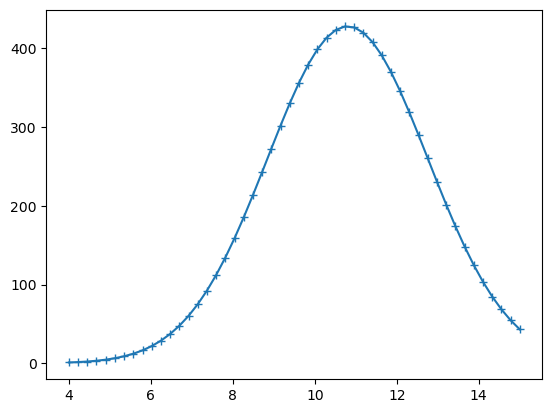

In [36]:
Lmax = 428
nmax = 10.8
d = 3.84
Ln = lambda n: Lmax*np.exp((-(n-nmax)**2)/(2*d))
    
rank = np.linspace(4,15)
plt.plot(rank, Ln(rank) , "-+")

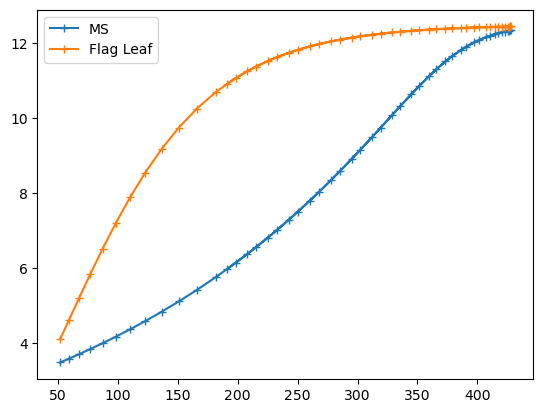

In [51]:
Wp = 12.5
b = 16.19
c = 0.0424
d = 10.96
W = lambda Lm: Wp/(1+np.exp(b-c*Lm))**(1/d)
rank = np.linspace(4,15)
plt.plot(Ln(rank), W(Ln(rank)) , "-+")
leaf_rank_length = dict((key, value) for key, value in zip(rank, Ln(rank)))
leaf_rank_width = dict((key, value) for key, value in zip(rank, W(Ln(rank))))

Flag_Wp = 12.5
Flag_b = -4.14
Flag_c = 0.0152
Flag_d = 0.00647
Flag_W = lambda Lm: Flag_Wp/(1+np.exp(Flag_b-Flag_c*Lm))**(1/Flag_d)
plt.plot(Ln(rank), Flag_W(Ln(rank)) , "-+")
plt.legend(['MS', 'Flag Leaf'])

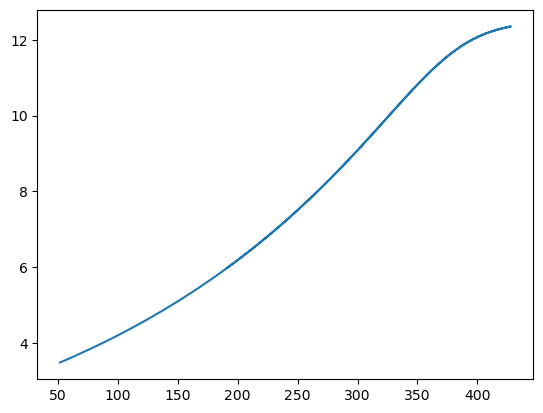

In [9]:
rank = np.linspace(4,15)
plt.plot(Ln(rank), W(Ln(rank)))

In [33]:
rank_theta01 = {3:40, 4:30, 5:39, 6:38, 7:29, 8:28, 7:15, 8:20, 9:15, 10:16, 11:18} # according to Fig.5
rank_theta03 = {rank: 81.7*(1-np.exp(-0.0379*theta)) for rank, theta in zip(rank_theta01.keys(), rank_theta01.values())}
rank_theta02 = {rank: 2*(theta3-theta1) for rank, theta1, theta3 in zip(rank_theta01.keys(), rank_theta01.values(), rank_theta03.values())}


20


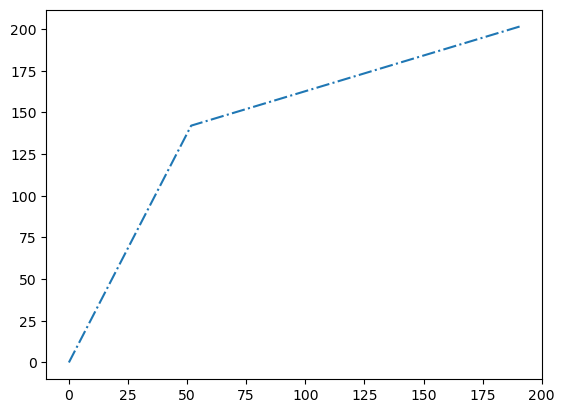

In [90]:
def leaf_rank_selector(in_key):
    return list(leaf_rank_length.keys())[np.argmin(abs(np.array(list(leaf_rank_length.keys()))-in_key))]

leaf_rank = 8
print(rank_theta01[leaf_rank])
length = leaf_rank_length[leaf_rank_selector(leaf_rank)]
x1 = length/2*np.sin(np.deg2rad(rank_theta01[leaf_rank]))
y1 = length/2*np.cos(np.deg2rad(rank_theta01[leaf_rank]))
hypotenuse = np.sqrt(   2*(length/2)**2-2*(length/2)**2*np.cos( np.pi-2*np.deg2rad( (rank_theta03[leaf_rank]-rank_theta01[leaf_rank]) ) ) )
x2 = hypotenuse*np.sin(np.deg2rad(rank_theta03[leaf_rank]))
y2 = hypotenuse*np.cos(np.deg2rad(rank_theta03[leaf_rank]))
points = [(0,0), (x1, y1),  (x2, y2)]
plt.plot(list(zip(*points))[0], list(zip(*points))[1] ,'-.')

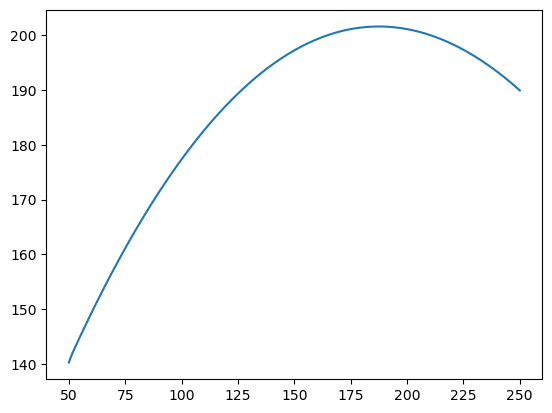

In [121]:
from scipy.interpolate import CubicHermiteSpline as CHS
chs = CHS(list(zip(*points))[0], list(zip(*points))[1], dydx = [1.1, 0.9, -0.02])
xcoord = np.linspace(50,250,500)
plt.plot(xcoord, chs(xcoord))

In [ ]:
## 

In [3]:
PLANT_DENSITY = {1: 250.}
INTER_ROW = 0.15
INPUTS_DIRPATH = 'inputs'
# Create the stand using density pattern
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)

# Create AdelDyn object and empty mtg
adel_wheat = AdelDyn(seed=1, scene_unit='m', stand=stand)
axeT_df = pd.read_csv(os.path.join(INPUTS_DIRPATH, 'axeTable_with_tiller.csv'))

In [3]:
g = MTG()
for i, plant in axeT_df.groupby('plant'):
    plant_properties = {'position': adel_wheat.positions[0],
                        'azimuth': adel_wheat.plant_azimuths[0],
                        'refplant_id': 0}
    
    ms = plant.loc[plant['axe'] == 'MS', :].to_dict('list')
    ms_properties = {'HS_final': float(ms['HS_final'][0]),
                     'nff': int(ms['nf'][0]),
                     'hasEar': bool(int(ms['hasEar'][0])),
                     'azimuth': 0}
    add_plant(g, i, plant_properties=plant_properties, axis_properties=ms_properties,)

In [4]:
phytoT_df = pd.read_csv(os.path.join('inputs', 'phytoT_with_tiller.csv'))

In [30]:
adel_wheat.add_metamer(g, phytoT_df, axe='MS')

108

In [10]:
adel_wheat.add_metamer(g, phytoT_df, axe='MS')

52

In [11]:
for i, plant in axeT_df.groupby('plant'):
    tiller = plant.loc[plant['axe']=='T1', :].to_dict('list')
    t_properties = {'HS_final': float(tiller['HS_final'][0]),
                     'nff': int(tiller['nf'][0]), 'hasEar': bool(int(tiller['hasEar'][0])),'azimuth': 0, 'inclination': 10}
    
    add_axe(g, 'T1', axis_properties=t_properties)
    

In [33]:
adel_wheat.add_metamer(g, phytoT_df, axe='T1')

123

In [22]:
g.node(33).properties()

{'edge_type': '<',
 'label': 'internode',
 'azimuth': 183.6433947,
 'ntop': 9,
 'length': 2,
 'visible_length': 2,
 'senesced_length': 0,
 'diameter': 0.05,
 'inclination': 0,
 'shape_mature_length': 1.0,
 'area': 0.3141592653589793}

In [16]:
g.display()

MTG : nb_vertices=108, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
	+T1			(id=27)										
	^/metamer0			(id=28)										
	^/collar			(id=29)										
	^/baseElement			(id=30)										
	^<topElement			(id=31)										
	^<metamer1			(id=32)										
	^/internode			(id=33)										
	^/baseElement			(id=34)										
	^<HiddenElement			(id=85)										
	^<StemElement			(id=84)										
	^<topElement			(id=35)										
		+sheath			(id=36)									
		^/baseElement			(id=37)									
		^<HiddenElement			(id=87)									
		^<StemElement			(id=86)									
		^<topElement			(id=38)									
		^<blade			(id=39)									
		^/baseElement			(id=40)									
		^<HiddenElement			(id=89)									
		^<LeafElement1			(id=88)									
		^<topElement			(i

In [34]:
for vid in g.property('visible_length'):
    if g.node(vid).label.startswith('blade'):
        g.property('visible_length')[vid] = 1.2
    elif g.node(vid).label.startswith('internode'):
        g.property('visible_length')[vid] = 2
        
for vid in g.property('length'):
    if g.node(vid).label.startswith('blade'):
        g.property('length')[vid] = 1.2
        g.property('shape_mature_length')[vid] = 1.5
        g.property('shape_max_width')[vid] = 0.08
    elif g.node(vid).label.startswith('internode'):
        g.property('length')[vid] = 2
        g.property('shape_mature_length')[vid] = 1.0
        g.property('diameter')[vid] = 0.05
        
for vid in g.property('inclination'):
    if g.node(vid).label.startswith('blade'):
        g.property('inclination')[vid] = 0
        
for vid in g.property('senesced_length'):
    if g.node(vid).label.startswith('internode'):
        g.property('senesced_length')[vid] = 0
    elif g.node(vid).label.startswith('blade'):
        g.property('senesced_length')[vid] = 0
        
for vid in g.property('rolled_length'):
    if g.node(vid).label.startswith('internode'):
        g.property('rolled_length')[vid] = 0
    elif g.node(vid).label.startswith('blade'):
        g.property('rolled_length')[vid] = 0

In [35]:
g.property('inclination')[33] = 30

In [36]:
adel_wheat.update_geometry(g)

In [37]:
from openalea.plantgl.all import Viewer, Scene
adel_wheat.plot(g)
Viewer.waitSelection()

0

In [5]:
axeT_df

,HS_final,axe,azT,azTb,disp,dredT,emf1,end,hasEar,incT,nf,nf_end,plant
0,12,MS,158.446716,0,NaN,0,21.543097,NaN,1,1.599404,12,12,1
1,9,T1,90.000000,0,NaN,0,18.543097,NaN,1,50.000000,9,9,1


In [4]:
# define the time step in hours for each simulator
CARIBU_TIMESTEP = 4
SENESCWHEAT_TIMESTEP = 1
FARQUHARWHEAT_TIMESTEP = 1
ELONGWHEAT_TIMESTEP = 1
GROWTHWHEAT_TIMESTEP = 1
CNWHEAT_TIMESTEP = 1

PLANT_DENSITY  = None
INTER_ROW = 0.15
# Define default plant density (culm m-2)
if PLANT_DENSITY is None:
    PLANT_DENSITY = {1: 250.}

# precision of floats used to write and format the output CSV files
OUTPUTS_PRECISION = 8

# number of seconds in 1 hour
HOUR_TO_SECOND_CONVERSION_FACTOR = 3600

# Name of the CSV files which will contain the outputs of the model
AXES_OUTPUTS_FILENAME = 'axes_outputs.csv'
ORGANS_OUTPUTS_FILENAME = 'organs_outputs.csv'
HIDDENZONES_OUTPUTS_FILENAME = 'hiddenzones_outputs.csv'
ELEMENTS_OUTPUTS_FILENAME = 'elements_outputs.csv'
SOILS_OUTPUTS_FILENAME = 'soils_outputs.csv'

# -- INPUTS CONFIGURATION --

# Path of the directory which contains the inputs of the model
INPUTS_DIRPATH = 'inputs'

# Name of the CSV files which describes the initial state of the system
AXES_INITIAL_STATE_FILENAME = 'axes_initial_state.csv'
ORGANS_INITIAL_STATE_FILENAME = 'organs_initial_state.csv'
HIDDENZONES_INITIAL_STATE_FILENAME = 'hiddenzones_initial_state.csv'
ELEMENTS_INITIAL_STATE_FILENAME = 'elements_initial_state.csv'
SOILS_INITIAL_STATE_FILENAME = 'soils_initial_state.csv'

# Read the inputs from CSV files and create inputs dataframes
inputs_dataframes = {}
new_start_time = -1
for inputs_filename in (AXES_INITIAL_STATE_FILENAME,
                        ORGANS_INITIAL_STATE_FILENAME,
                        HIDDENZONES_INITIAL_STATE_FILENAME,
                        ELEMENTS_INITIAL_STATE_FILENAME,
                        SOILS_INITIAL_STATE_FILENAME):
    inputs_dataframe = pd.read_csv(os.path.join(INPUTS_DIRPATH, inputs_filename))
    inputs_dataframes[inputs_filename] = inputs_dataframe.where(inputs_dataframe.notnull(), None)

# Start time of the simulation
START_TIME = max(0, new_start_time)

# Name of the CSV files which contains the meteo data
meteo = pd.read_csv(os.path.join('inputs', 'meteo_PAR1500.csv'), index_col='t')

# -- OUTPUTS CONFIGURATION --

# Save the outputs with a full scan of the MTG at each time step (or at selected time steps)
UPDATE_SHARED_DF = False

# create empty dataframes to shared data between the models
shared_axes_inputs_outputs_df = pd.DataFrame()
shared_organs_inputs_outputs_df = pd.DataFrame()
shared_hiddenzones_inputs_outputs_df = pd.DataFrame()
shared_elements_inputs_outputs_df = pd.DataFrame()
shared_soils_inputs_outputs_df = pd.DataFrame()

# define lists of dataframes to store the inputs and the outputs of the models at each step.
axes_all_data_list = []
organs_all_data_list = []  # organs which belong to axes: roots, phloem, grains
hiddenzones_all_data_list = []
elements_all_data_list = []
soils_all_data_list = []

all_simulation_steps = []  # to store the steps of the simulation

# -- POSTPROCESSING CONFIGURATION --

# Name of the CSV files which will contain the postprocessing of the model
AXES_POSTPROCESSING_FILENAME = 'axes_postprocessing.csv'
ORGANS_POSTPROCESSING_FILENAME = 'organs_postprocessing.csv'
HIDDENZONES_POSTPROCESSING_FILENAME = 'hiddenzones_postprocessing.csv'
ELEMENTS_POSTPROCESSING_FILENAME = 'elements_postprocessing.csv'
SOILS_POSTPROCESSING_FILENAME = 'soils_postprocessing.csv'

# -- ADEL and MTG CONFIGURATION --

# Create the stand using density pattern
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)

# Create AdelDyn object and empty mtg
adel_wheat = AdelDyn(seed=1, scene_unit='m', leaves=echap_leaves(xy_model='Soissons_byleafclass', top_leaves=0), stand=stand)
axeT_df = pd.read_csv(os.path.join(INPUTS_DIRPATH, 'axeTable.csv'))

update_parameters_all_models = None
update_parameters_elongwheat = None
N_fertilizations = None
# Final leaf number
nff = 50
axeT_df.HS_final = nff
axeT_df.nf = nff
axeT_df.nf_end = nff

# mtg
g = adel_wheat.build_stand(axeT_df)

# ---------------------------------------------
# ----- CONFIGURATION OF THE FACADES -------
# ---------------------------------------------

# -- ELONGWHEAT (created first because it is the only facade to add new metamers) --
# Initial states
elongwheat_hiddenzones_initial_state = inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME][
    elongwheat_facade.converter.HIDDENZONE_TOPOLOGY_COLUMNS + [i for i in elongwheat_facade.simulation.HIDDENZONE_INPUTS if i in
                                                               inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME].columns]].copy()
elongwheat_elements_initial_state = inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME][
    elongwheat_facade.converter.ELEMENT_TOPOLOGY_COLUMNS + [i for i in elongwheat_facade.simulation.ELEMENT_INPUTS if i in
                                                            inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME].columns]].copy()
elongwheat_axes_initial_state = inputs_dataframes[AXES_INITIAL_STATE_FILENAME][
    elongwheat_facade.converter.AXIS_TOPOLOGY_COLUMNS + [i for i in elongwheat_facade.simulation.AXIS_INPUTS if i in inputs_dataframes[AXES_INITIAL_STATE_FILENAME].columns]].copy()

phytoT_df = pd.read_csv(os.path.join(INPUTS_DIRPATH, 'phytoT.csv'))


# Facade initialisation
elongwheat_facade_ = elongwheat_facade.ElongWheatFacade(g,
                                                        ELONGWHEAT_TIMESTEP * HOUR_TO_SECOND_CONVERSION_FACTOR,
                                                        elongwheat_axes_initial_state,
                                                        elongwheat_hiddenzones_initial_state,
                                                        elongwheat_elements_initial_state,
                                                        shared_axes_inputs_outputs_df,
                                                        shared_hiddenzones_inputs_outputs_df,
                                                        shared_elements_inputs_outputs_df,
                                                        adel_wheat, phytoT_df,
                                                        update_parameters_elongwheat,
                                                        update_shared_df=UPDATE_SHARED_DF)

# -- CARIBU --
caribu_facade_ = caribu_facade.CaribuFacade(g,
                                            shared_elements_inputs_outputs_df,
                                            adel_wheat,
                                            update_shared_df=UPDATE_SHARED_DF)

# -- SENESCWHEAT --
# Initial states    
senescwheat_roots_initial_state = inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME].loc[inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME]['organ'] == 'roots'][
    senescwheat_facade.converter.ROOTS_TOPOLOGY_COLUMNS +
    [i for i in senescwheat_facade.converter.SENESCWHEAT_ROOTS_INPUTS if i in inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME].columns]].copy()

senescwheat_elements_initial_state = inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME][
    senescwheat_facade.converter.ELEMENTS_TOPOLOGY_COLUMNS +
    [i for i in senescwheat_facade.converter.SENESCWHEAT_ELEMENTS_INPUTS if i in inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME].columns]].copy()

senescwheat_axes_initial_state = inputs_dataframes[AXES_INITIAL_STATE_FILENAME][
    senescwheat_facade.converter.AXES_TOPOLOGY_COLUMNS +
    [i for i in senescwheat_facade.converter.SENESCWHEAT_AXES_INPUTS if i in inputs_dataframes[AXES_INITIAL_STATE_FILENAME].columns]].copy()

# Update parameters if specified

update_parameters_senescwheat = None

# Facade initialisation
senescwheat_facade_ = senescwheat_facade.SenescWheatFacade(g,
                                                           SENESCWHEAT_TIMESTEP * HOUR_TO_SECOND_CONVERSION_FACTOR,
                                                           senescwheat_roots_initial_state,
                                                           senescwheat_axes_initial_state,
                                                           senescwheat_elements_initial_state,
                                                           shared_organs_inputs_outputs_df,
                                                           shared_axes_inputs_outputs_df,
                                                           shared_elements_inputs_outputs_df,
                                                           update_parameters_senescwheat,
                                                           update_shared_df=UPDATE_SHARED_DF)

# -- FARQUHARWHEAT --
# Initial states    
farquharwheat_elements_initial_state = inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME][
    farquharwheat_facade.converter.ELEMENT_TOPOLOGY_COLUMNS +
    [i for i in farquharwheat_facade.converter.FARQUHARWHEAT_ELEMENTS_INPUTS if i in inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME].columns]].copy()

farquharwheat_axes_initial_state = inputs_dataframes[AXES_INITIAL_STATE_FILENAME][
    farquharwheat_facade.converter.AXIS_TOPOLOGY_COLUMNS +
    [i for i in farquharwheat_facade.converter.FARQUHARWHEAT_AXES_INPUTS if i in inputs_dataframes[AXES_INITIAL_STATE_FILENAME].columns]].copy()

# Update parameters if specified
if update_parameters_all_models and 'farquharwheat' in update_parameters_all_models:
    update_parameters_farquharwheat = update_parameters_all_models['farquharwheat']
else:
    update_parameters_farquharwheat = None

# Facade initialisation
farquharwheat_facade_ = farquharwheat_facade.FarquharWheatFacade(g,
                                                                 farquharwheat_elements_initial_state,
                                                                 farquharwheat_axes_initial_state,
                                                                 shared_elements_inputs_outputs_df,
                                                                 update_parameters_farquharwheat,
                                                                 update_shared_df=UPDATE_SHARED_DF)

# -- GROWTHWHEAT --
# Initial states    
growthwheat_hiddenzones_initial_state = inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME][
    growthwheat_facade.converter.HIDDENZONE_TOPOLOGY_COLUMNS +
    [i for i in growthwheat_facade.simulation.HIDDENZONE_INPUTS if i in inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME].columns]].copy()

growthwheat_elements_initial_state = inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME][
    growthwheat_facade.converter.ELEMENT_TOPOLOGY_COLUMNS +
    [i for i in growthwheat_facade.simulation.ELEMENT_INPUTS if i in inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME].columns]].copy()

growthwheat_root_initial_state = inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME].loc[inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME]['organ'] == 'roots'][
    growthwheat_facade.converter.ROOT_TOPOLOGY_COLUMNS +
    [i for i in growthwheat_facade.simulation.ROOT_INPUTS if i in inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME].columns]].copy()

growthwheat_axes_initial_state = inputs_dataframes[AXES_INITIAL_STATE_FILENAME][
    growthwheat_facade.converter.AXIS_TOPOLOGY_COLUMNS +
    [i for i in growthwheat_facade.simulation.AXIS_INPUTS if i in inputs_dataframes[AXES_INITIAL_STATE_FILENAME].columns]].copy()

# Update parameters if specified
if update_parameters_all_models and 'growthwheat' in update_parameters_all_models:
    update_parameters_growthwheat = update_parameters_all_models['growthwheat']
else:
    update_parameters_growthwheat = None

# Facade initialisation
growthwheat_facade_ = growthwheat_facade.GrowthWheatFacade(g,
                                                           GROWTHWHEAT_TIMESTEP * HOUR_TO_SECOND_CONVERSION_FACTOR,
                                                           growthwheat_hiddenzones_initial_state,
                                                           growthwheat_elements_initial_state,
                                                           growthwheat_root_initial_state,
                                                           growthwheat_axes_initial_state,
                                                           shared_organs_inputs_outputs_df,
                                                           shared_hiddenzones_inputs_outputs_df,
                                                           shared_elements_inputs_outputs_df,
                                                           shared_axes_inputs_outputs_df,
                                                           update_parameters_growthwheat,
                                                           update_shared_df=UPDATE_SHARED_DF)

# -- CNWHEAT --
# Initial states    
cnwheat_organs_initial_state = inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME][
    [i for i in cnwheat_facade.cnwheat_converter.ORGANS_VARIABLES if i in inputs_dataframes[ORGANS_INITIAL_STATE_FILENAME].columns]].copy()

cnwheat_hiddenzones_initial_state = inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME][
    [i for i in cnwheat_facade.cnwheat_converter.HIDDENZONE_VARIABLES if i in inputs_dataframes[HIDDENZONES_INITIAL_STATE_FILENAME].columns]].copy()

cnwheat_elements_initial_state = inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME][
    [i for i in cnwheat_facade.cnwheat_converter.ELEMENTS_VARIABLES if i in inputs_dataframes[ELEMENTS_INITIAL_STATE_FILENAME].columns]].copy()

cnwheat_soils_initial_state = inputs_dataframes[SOILS_INITIAL_STATE_FILENAME][
    [i for i in cnwheat_facade.cnwheat_converter.SOILS_VARIABLES if i in inputs_dataframes[SOILS_INITIAL_STATE_FILENAME].columns]].copy()

# Update parameters if specified
if update_parameters_all_models and 'cnwheat' in update_parameters_all_models:
    update_parameters_cnwheat = update_parameters_all_models['cnwheat']
else:
    update_parameters_cnwheat = {}

# Facade initialisation
cnwheat_facade_ = cnwheat_facade.CNWheatFacade(g,
                                               CNWHEAT_TIMESTEP * HOUR_TO_SECOND_CONVERSION_FACTOR,
                                               PLANT_DENSITY,
                                               update_parameters_cnwheat,
                                               cnwheat_organs_initial_state,
                                               cnwheat_hiddenzones_initial_state,
                                               cnwheat_elements_initial_state,
                                               cnwheat_soils_initial_state,
                                               shared_axes_inputs_outputs_df,
                                               shared_organs_inputs_outputs_df,
                                               shared_hiddenzones_inputs_outputs_df,
                                               shared_elements_inputs_outputs_df,
                                               shared_soils_inputs_outputs_df,
                                               update_shared_df=UPDATE_SHARED_DF)

# Run cnwheat with constant nitrates concentration in the soil if specified
if N_fertilizations is not None and 'constant_Conc_Nitrates' in N_fertilizations.keys():
    cnwheat_facade_.soils[(1, 'MS')].constant_Conc_Nitrates = True  # TODO: make (1, 'MS') more general
    cnwheat_facade_.soils[(1, 'MS')].nitrates = N_fertilizations['constant_Conc_Nitrates'] * cnwheat_facade_.soils[(1, 'MS')].volume

# -- FSPMWHEAT --
# Facade initialisation
fspmwheat_facade_ = fspmwheat_facade.FSPMWheatFacade(g)

# Update geometry
g = adel_wheat.update_geometry(g)
g.reindex()

In [5]:
g.node(11).properties()

{'edge_type': '<',
 'label': 'StemElement',
 'azimuth': 183.6433947,
 'length': 0.0,
 'green_area': 0.0,
 'senesced_length': 0.0,
 'inclination': 0,
 'area': 0.0,
 'green_length': 0.0,
 'senesced_area': 0.0,
 'is_green': True}

In [8]:
g.node(25).properties()

{'edge_type': '<', 'label': 'baseElement'}

In [7]:
g.display()

MTG : nb_vertices=160, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=10)											
^<StemElement			(id=11)											
^<topElement			(id=12)											
	+sheath			(id=13)										
	^/baseElement			(id=14)										
	^<HiddenElement			(id=15)										
	^<StemElement			(id=16)										
	^<topElement			(id=17)										
	^<blade			(id=18)										
	^/baseElement			(id=19)										
	^<HiddenElement			(id=20)										
	^<LeafElement1			(id=21)										
	^<topElement			(id=22)										
^<metamer2			(id=23)											
^/internode			(id=24)											
^/baseElement			(id=25)											
^<HiddenElement			(id=26)											
^<StemElement			(id=27)											
^<topElement			(id=28)											
	+sheath			(id=29)										
	^/bas

In [3]:
g.display()

MTG : nb_vertices=160, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=10)											
^<StemElement			(id=11)											
^<topElement			(id=12)											
	+sheath			(id=13)										
	^/baseElement			(id=14)										
	^<HiddenElement			(id=15)										
	^<StemElement			(id=16)										
	^<topElement			(id=17)										
	^<blade			(id=18)										
	^/baseElement			(id=19)										
	^<HiddenElement			(id=20)										
	^<LeafElement1			(id=21)										
	^<topElement			(id=22)										
^<metamer2			(id=23)											
^/internode			(id=24)											
^/baseElement			(id=25)											
^<HiddenElement			(id=26)											
^<StemElement			(id=27)											
^<topElement			(id=28)											
	+sheath			(id=29)										
	^/bas

In [4]:
from openalea.plantgl.all import Viewer, Scene
adel_wheat.plot(g)
Viewer.waitSelection()

0

In [76]:
vtxList = [k for k,v in g.property('edge_type').items() if v=='/']
names = [ g.property('label')[vid] for vid in vtxList ]
print(names)

['plant1', 'MS', 'metamer0', 'collar', 'baseElement']


In [3]:
g.display()

MTG : nb_vertices=178, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=108)											
^<StemElement			(id=107)											
^<topElement			(id=10)											
	+sheath			(id=11)										
	^/baseElement			(id=12)										
	^<HiddenElement			(id=110)										
	^<StemElement			(id=109)										
	^<topElement			(id=13)										
	^<blade			(id=14)										
	^/baseElement			(id=15)										
	^<HiddenElement			(id=111)										
	^<LeafElement1			(id=157)										
	^<topElement			(id=16)										
^<metamer2			(id=17)											
^/internode			(id=18)											
^/baseElement			(id=19)											
^<HiddenElement			(id=113)											
^<StemElement			(id=112)											
^<topElement			(id=20)											
	+sheath			(id=21)									

# Plantgl Exercise

In [1]:
import numpy as np
from openalea.plantgl.all import *

In [2]:
def quad_cyl(radius, height, slices = 12):
    points = []
    indices = []
    for i in range(slices):
        points += [(radius*np.cos(2*i*np.pi/slices), radius*np.sin(2*i*np.pi/slices), 0),
                   (radius*np.cos(2*i*np.pi/slices), radius*np.sin(2*i*np.pi/slices), height)]
        
        if i is not (slices-1):
            indices += [(2*i, 2*i+1, 2*i+3, 2*i+2)]
        else:
            indices += [(2*i, 2*i+1, 1, 0)]
            
    cyl = QuadSet(points, indices)
    return cyl

In [3]:
cyl1 = quad_cyl(1,4)
cyl2 = Translated(-4,0,0,quad_cyl(1,4,6))
cyl3 = Translated(4,0,0, quad_cyl(1,4,3))

m1 = Material(Color3(150,0,0))
m2 = Material(Color3(0,150,0))
m3 = Material(Color3(0,0,150))

shapes = [Shape(cyl1, m1), Shape(cyl2,m2), Shape(cyl3, m3)]
Viewer.display(Scene(shapes))
Viewer.waitSelection()

1

# Caribu Exercise

In [1]:
import openalea.plantgl.all as pgl
from alinea.caribu.CaribuScene import CaribuScene
from alinea.caribu.data_samples import data_path

In [2]:
can = str(data_path('f331s1_100plantes.can'))
sky = str(data_path('Turtle16soc.light'))
opts = list(map(str, [data_path('par.opt'), data_path('nir.opt')]))

In [3]:
cs = CaribuScene(scene=can, light=sky, opt=opts, debug=True)#, pattern=(xs_min-5, ys_min-5, xs_max+5, ys_max+5))

In [6]:
# extract the domain of the current scene.
import numpy as np
xs_min = ys_min = np.inf
xs_max = ys_max = -np.inf
for element in list(cs.scene.values()):
    for primitive in element:
        xs,ys,zs = list(zip(*primitive))
        if xs_min>np.min(xs):
            xs_min = np.min(xs)
        if ys_min>np.min(ys):
            ys_min = np.min(ys)
        if xs_max<np.max(xs):
            xs_max = np.max(xs)
        if ys_max<np.max(ys):
            ys_max = np.max(ys)

In [4]:
raw,agg=cs.run(simplify=True, direct=True, infinite=False)

Prepare scene 16
done

 >>>> Caribu.__init__ starts...


 <<<< Caribu.__init__ ends...


 >>>> Caribu.run() starts...


>>> Caribu state in  Caribu::init()
<<<<


band0
>>> Canestrad(): canestrad -M cscene.can -l sky.light -p band0.opt -A   -1     -L 1536  
>>> caribu.py: Caribu::canestra (band0) finished !

 <<<< Caribu.run() ends...

Caribu.__del__ called, tmp dir kept: ./Run-tmp


In [5]:
scene,values = cs.plot(raw['par']['Eabs'],display=False)
import numpy as np
v99 = np.percentile(values, 99)
nvalues=np.array(values)
nvalues[nvalues>v99]=v99
values = nvalues.tolist()

In [6]:
from oawidgets.plantgl import *
PlantGL(scene, group_by_color=False, property=values)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

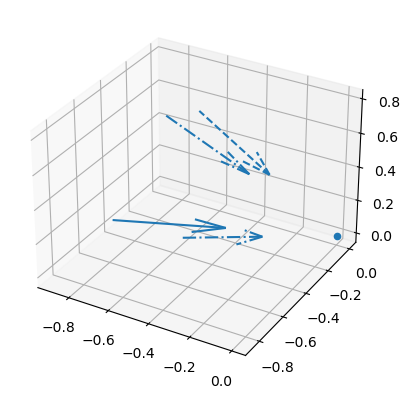

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
value_0448 = [0.2764, 0.8506, -0.4473]
value_0108 = [0.4912,0.3568,-0.7946]
value_0177 = [0.7947, 0.5774, -0.1876]
ax.quiver(*([-v for v in value_0177]), *value_0177, length=0.5, normalize=False)
ax.quiver(*([-v for v in value_0448]), *value_0448,  length=0.5, normalize=False, linestyle='-.')
ax.quiver(*[-0.8944,0,0.4473], *[0.8944,0,-0.4473],  length=0.5, normalize=False, linestyle='-.')
ax.quiver(*([-v for v in value_0108]), *value_0108, length=0.5, normalize=False, linestyle='--')


ax.scatter(0,0,0,'+')